# Major Project: Energy Consumption Time-Series Analysis

This notebook covers data preprocessing, analysis, and visualization of energy consumption datasets.

# Building Energy Anomaly Detection – Major Project

## Project Overview
This major project focuses on detecting anomalies in building energy consumption using time-series data from multiple energy sources such as electricity, gas, water, solar, steam, chilled water, irrigation, and weather data.

The objective is to preprocess raw energy datasets, engineer meaningful temporal features, and apply unsupervised machine learning models to identify unusual energy usage patterns that may indicate faults, inefficiencies, or abnormal operational behavior.

---

## Objectives
- Clean and preprocess multi-source energy time-series data  
- Handle missing values and ensure temporal consistency  
- Engineer time-based and statistical features  
- Train anomaly detection models  
- Visualize and analyze detected anomalies  

---

## Tools & Technologies
- Python  
- Pandas, NumPy  
- Scikit-learn  
- Matplotlib, Seaborn  
- Jupyter Notebook  

---

## Project Structure
This notebook is organized into the following sections:
1. Exploratory Data Analysis (EDA)  
2. Data Preprocessing  
3. Feature Engineering  
4. Model Training  
5. Results & Visualization  
6. Conclusion

# Dataset Information

## Dataset Description
The datasets used in this project consist of time-series data related to building energy consumption collected from multiple sources, including electricity, gas, water, solar, steam, chilled water, irrigation, and weather parameters.

These datasets capture energy usage patterns at regular time intervals and are suitable for analyzing trends, seasonality, and anomalies in building operations.

---

## Dataset Source
The datasets used in this project are inspired by and derived from publicly available building energy datasets from Kaggle, specifically the Building Data Genome Project 2.

🔗 Dataset Reference:
https://www.kaggle.com/datasets/claytonmiller/buildingdatagenomeproject2

The original datasets were cleaned, merged, and transformed as part of the preprocessing and feature engineering pipeline implemented in this project. As a result, the final processed datasets differ from the original source.

---

## Data Availability Note
Due to GitHub file size limitations, large CSV datasets are not included directly in this repository.

The datasets are generated and processed during runtime through the preprocessing and feature engineering steps provided in this notebook.

In [6]:
import pandas as pd
df=pd.read_csv("../data/raw/electricity.csv")
df

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,...,96.925,704.950,111.350,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17540,2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,...,97.550,695.700,115.875,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17541,2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,...,93.825,687.325,111.650,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17542,2017-12-31 22:00:00,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,...,94.150,674.275,111.950,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000


In [7]:
#intial inspection
df.shape


(17544, 1579)

In [8]:
df.columns

Index(['timestamp', 'Panther_parking_Lorriane', 'Panther_lodging_Cora',
       'Panther_office_Hannah', 'Panther_lodging_Hattie',
       'Panther_education_Teofila', 'Panther_education_Jerome',
       'Panther_retail_Felix', 'Panther_parking_Asia',
       'Panther_education_Misty',
       ...
       'Cockatoo_public_Caleb', 'Cockatoo_education_Tyler',
       'Cockatoo_public_Shad', 'Mouse_health_Buddy', 'Mouse_health_Modesto',
       'Mouse_lodging_Vicente', 'Mouse_health_Justin', 'Mouse_health_Ileana',
       'Mouse_health_Estela', 'Mouse_science_Micheal'],
      dtype='object', length=1579)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 1579 entries, timestamp to Mouse_science_Micheal
dtypes: float64(1578), object(1)
memory usage: 211.3+ MB


In [10]:
#converting timestamp to datestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [11]:
#choosing the one building
selected_building = 'Panther_office_Hannah'


In [12]:
#creating the reduces dataset (2 colmns only)
subset = df[['timestamp', selected_building]]


In [13]:
subset.head

<bound method NDFrame.head of                 timestamp  Panther_office_Hannah
0     2016-01-01 00:00:00                 0.0000
1     2016-01-01 01:00:00                 0.0000
2     2016-01-01 02:00:00                 0.0000
3     2016-01-01 03:00:00                 0.0000
4     2016-01-01 04:00:00                 0.0000
...                   ...                    ...
17539 2017-12-31 19:00:00                 3.4357
17540 2017-12-31 20:00:00                 3.4087
17541 2017-12-31 21:00:00                 3.3546
17542 2017-12-31 22:00:00                 3.2876
17543 2017-12-31 23:00:00                 3.3686

[17544 rows x 2 columns]>

In [14]:
#renaming the col
subset = subset.rename(columns={
    selected_building: 'electricity'
})


In [15]:
subset.head

<bound method NDFrame.head of                 timestamp  electricity
0     2016-01-01 00:00:00       0.0000
1     2016-01-01 01:00:00       0.0000
2     2016-01-01 02:00:00       0.0000
3     2016-01-01 03:00:00       0.0000
4     2016-01-01 04:00:00       0.0000
...                   ...          ...
17539 2017-12-31 19:00:00       3.4357
17540 2017-12-31 20:00:00       3.4087
17541 2017-12-31 21:00:00       3.3546
17542 2017-12-31 22:00:00       3.2876
17543 2017-12-31 23:00:00       3.3686

[17544 rows x 2 columns]>

In [16]:
#reducing the time range
subset = subset[
    (subset['timestamp'] >= '2017-01-01') &
    (subset['timestamp'] <= '2017-06-30')
]


In [17]:
subset.shape

(4321, 2)

In [18]:
#Basic data hygiene
subset = subset.drop_duplicates()
subset = subset.sort_values('timestamp')

subset.isnull().sum()


timestamp       0
electricity    12
dtype: int64

In [20]:
#saving the file
subset.to_csv("../data/raw/energy_subset.csv", index=False)


In [24]:
#verifying the data 
df_final = pd.read_csv("../data/raw/energy_subset.csv")
df_final.head()


,timestamp,electricity
0,2017-01-01 00:00:00,4.1128
1,2017-01-01 01:00:00,4.1008
2,2017-01-01 02:00:00,4.2158
3,2017-01-01 03:00:00,4.1498
4,2017-01-01 04:00:00,4.1738


# Data Preprocessing (Time-Series Cleaning)

This section performs preprocessing on multiple energy-related time-series datasets to ensure consistency, cleanliness, and readiness for feature engineering and modeling.

In [25]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

### Loading Raw Energy Datasets

Multiple energy consumption datasets (electricity, gas, water, solar, steam, chilled water, hot water, irrigation, and weather) are loaded from CSV files for preprocessing.

In [28]:
path = "../data/raw/"

files = {
    "electricity": "electricity.csv",
    "gas": "gas.csv",
    "water": "water.csv",
    "solar": "solar.csv",
    "steam": "steam.csv",
    "chilledwater": "chilledwater.csv",
    "hotwater": "hotwater.csv",
    "irrigation": "irrigation.csv",
    "weather": "weather.csv"
}

datasets = {}

for name, file in files.items():
    df = pd.read_csv(path + file)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.sort_values("timestamp").set_index("timestamp")
    df = df.ffill().bfill()                # fill per dataset (FAST)
    df = df.add_prefix(f"{name}_")          # avoid column conflicts
    datasets[name] = df

In [29]:
energy_combined = pd.concat(datasets.values(), axis=1)

In [30]:
energy_numeric = energy_combined.select_dtypes(include="number")

In [31]:
energy_numeric = energy_numeric.dropna(axis=1, how="all")

In [32]:
scaler = MinMaxScaler()
energy_scaled = pd.DataFrame(
    scaler.fit_transform(energy_numeric),
    index=energy_numeric.index,
    columns=energy_numeric.columns
)

### Datetime Parsing and Indexing

The `timestamp` column is converted to datetime format and set as the index for each dataset.  
This ensures proper time-series alignment and enables efficient temporal operations.

In [33]:
energy_numeric.index = pd.to_datetime(energy_numeric.index)

### Handling Missing Values

Missing values within each dataset are handled using:
- Forward fill (`ffill`)
- Backward fill (`bfill`)

This approach maintains temporal continuity and avoids excessive data loss or memory overhead caused by dropping rows.

In [36]:
#energy_agg = energy_agg.sort_index()
#nergy_agg = energy_agg.ffill().bfill()

# Feature Engineering

This section focuses on transforming the cleaned energy consumption time-series data into informative features that can improve model performance.

Feature engineering helps capture temporal patterns, trends, and dependencies present in energy usage data.

In [37]:
energy_agg = {}

for name, df in datasets.items():
    # keep numeric only
    numeric = df.select_dtypes(include="number")
    
    # aggregate (mean across meters)
    energy_agg[name] = numeric.mean(axis=1)

energy_agg = pd.DataFrame(energy_agg)
energy_agg.head()

,electricity,gas,water,solar,steam,chilledwater,hotwater,irrigation,weather
timestamp,,,,,,,,,
2016-01-01,90.377394,387.496172,515.860312,49.24915,3469.27018,21209.73696,53850.855544,0.407189,132.2250
2016-01-01,90.377394,387.496172,515.860312,49.24915,3469.27018,21209.73696,53850.855544,0.407189,136.2375
2016-01-01,90.377394,387.496172,515.860312,49.24915,3469.27018,21209.73696,53850.855544,0.407189,127.8750
2016-01-01,90.377394,387.496172,515.860312,49.24915,3469.27018,21209.73696,53850.855544,0.407189,127.7625
2016-01-01,90.377394,387.496172,515.860312,49.24915,3469.27018,21209.73696,53850.855544,0.407189,162.2250


### Time-Based Features

Since the dataset is indexed by timestamps, time-based features are extracted to capture periodic patterns in energy consumption.

The following features are created:
- **Hour of the day** (0–23)
- **Day of the week** (0 = Monday, 6 = Sunday)

These features help models learn daily and weekly consumption cycles.

In [38]:
features = energy_numeric.copy()

features["hour"] = features.index.hour
features["day_of_week"] = features.index.dayofweek

### Core Energy Columns Selection

To avoid memory and performance issues, feature engineering operations are applied only to a subset of core energy columns (first 5 columns).  
This ensures faster execution while still preserving meaningful energy patterns.

In [39]:
core_cols = features.columns[:5]   # take first 5 energy columns (safe & fast)

In [40]:
for col in core_cols:
    features[f"{col}_roll24_mean"] = features[col].rolling(window=24).mean()
    features[f"{col}_roll24_std"] = features[col].rolling(window=24).std()

### Lag Features
- A *lag-1 feature (t−1)* is created for each selected energy column.
- Lag features help capture temporal dependency between consecutive time steps.

In [41]:
for col in core_cols:
    features[f"{col}_lag1"] = features[col].shift(1)

### Rolling Statistics
- *24-hour rolling mean*: Captures daily consumption trends.
- *24-hour rolling standard deviation*: Measures short-term variability in energy usage.

Rolling features smooth out noise and highlight temporal trends in energy consumption.

In [42]:
for col in energy_agg.columns:
    features[f"{col}_roll_mean_24"] = energy_agg[col].rolling(24).mean()
    features[f"{col}_roll_std_24"]  = energy_agg[col].rolling(24).std()

In [43]:
features = features.iloc[24:]

### Initial Rows Handling
The first 24 rows are removed to eliminate NaN values introduced by lag and rolling operations, ensuring clean and consistent feature data.

Overall, this feature engineering strategy balances temporal richness with computational efficiency, making the dataset suitable for downstream modeling tasks.

In [44]:
features.head()

,electricity_Panther_parking_Lorriane,electricity_Panther_lodging_Cora,electricity_Panther_office_Hannah,electricity_Panther_lodging_Hattie,electricity_Panther_education_Teofila,electricity_Panther_education_Jerome,electricity_Panther_retail_Felix,electricity_Panther_parking_Asia,electricity_Panther_education_Misty,electricity_Panther_retail_Gilbert,...,steam_roll_mean_24,steam_roll_std_24,chilledwater_roll_mean_24,chilledwater_roll_std_24,hotwater_roll_mean_24,hotwater_roll_std_24,irrigation_roll_mean_24,irrigation_roll_std_24,weather_roll_mean_24,weather_roll_std_24
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3480.866653,16.752616,20560.803303,937.469183,55097.454722,1800.874866,3.702200,4.760072,150.485938,14.412788
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3482.316212,17.204598,20479.686595,962.761910,55253.279619,1849.462101,4.114076,4.888498,150.429167,14.473906
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3483.765771,17.520305,20398.569888,980.428740,55409.104516,1883.400016,4.525953,4.978203,152.020833,13.977716
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3485.215331,17.707027,20317.453181,990.877654,55564.929413,1903.472342,4.937829,5.031258,153.203125,13.002664
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3486.664890,17.768832,20236.336474,994.336225,55720.754311,1910.116244,5.349705,5.048819,153.196875,12.998175


### Saving Engineered Features

The final feature-engineered dataset is saved for downstream tasks such as modeling and evaluation.

**Output file:**
- `data/processed/features_energy.csv`

In [ ]:
features.to_csv(
    "../data/processed/features_energy.csv",
    index=True
)

In [ ]:
import os
os.path.exists("data/processed/features_energy.csv")

True

In [ ]:
os.path.getsize("data/processed/features_energy.csv") / (1024**2)

6905.174704551697

In [ ]:
import os
os.makedirs("data/processed", exist_ok=True)

In [ ]:
import os
os.getcwd()

'C:\\Users\\RENUKA\\Downloads\\Evoastra_major_project (1)\\Evoastra\\data'

# 04.Model Building

### 1. Loading Feature-Engineered Dataset

In this step, the finalized feature-engineered dataset is loaded.  
All data preprocessing and feature engineering steps were completed earlier, and this notebook focuses only on machine learning model training and evaluation.


In [47]:
# Drop timestamp if present
X = df.drop(columns=["timestamp"], errors="ignore")

print("Feature matrix shape:", X.shape)


Feature matrix shape: (331166, 9)


### 2. Feature Selection for Machine Learning

Isolation Forest requires numeric input features.  
Non-numeric columns such as identifiers or categorical labels are removed to ensure the model learns only from numerical energy usage patterns.


In [49]:
# Keep only numeric columns
X = df.select_dtypes(include=["number"])

print("Numeric feature matrix shape:", X.shape)
print("Numeric columns:")
print(X.columns)


Numeric feature matrix shape: (331166, 8)
Numeric columns:
Index(['weather_airTemperature', 'weather_cloudCoverage',
       'weather_dewTemperature', 'weather_precipDepth1HR',
       'weather_precipDepth6HR', 'weather_seaLvlPressure',
       'weather_windDirection', 'weather_windSpeed'],
      dtype='object')


In [51]:
import os

os.makedirs("../models", exist_ok=True)


### 3. Feature Scaling

Feature scaling is applied using StandardScaler to normalize numerical features.  
Although Isolation Forest is relatively scale-invariant, normalization improves numerical stability and ensures consistent model behavior.  
The fitted scaler is saved for reproducibility.


In [52]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler (for reproducibility)
joblib.dump(scaler, "../models/scaler.pkl")

print("Scaling completed.")


Scaling completed.


### 4. Train, Validation, and Test Split

The dataset is split into training, validation, and test sets.  
- Training set is used to fit the model  
- Validation set helps assess model stability  
- Test set evaluates generalization  

This split ensures that the model does not learn from future or unseen data.


In [53]:
from sklearn.model_selection import train_test_split

# 70% Train, 15% Val, 15% Test
X_train, X_temp = train_test_split(
    X_scaled, test_size=0.3, random_state=42, shuffle=True
)

X_val, X_test = train_test_split(
    X_temp, test_size=0.5, random_state=42, shuffle=True
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (231816, 8)
Validation shape: (49675, 8)
Test shape: (49675, 8)


### 5. Isolation Forest Model Training

Isolation Forest is an unsupervised anomaly detection algorithm that isolates anomalies based on random feature splits.  
The model is trained only on the training dataset to learn normal energy consumption patterns.


In [54]:
from sklearn.ensemble import IsolationForest

iso_model = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42,
    n_jobs=-1
)

iso_model.fit(X_train)

print("Isolation Forest model trained.")


Isolation Forest model trained.


### 6. Anomaly Prediction on Validation and Test Data

After training, the model predicts anomalies on the validation and test datasets.  
The percentage of detected anomalies is calculated to check consistency and model stability across unseen data.


In [55]:
val_pred = (iso_model.predict(X_val) == -1).astype(int)
test_pred = (iso_model.predict(X_test) == -1).astype(int)

print("Validation anomaly percentage:", val_pred.mean() * 100)
print("Test anomaly percentage:", test_pred.mean() * 100)


Validation anomaly percentage: 4.9904378459989935
Test anomaly percentage: 5.024660291897333


### 7. Pseudo-Label Generation for Evaluation

Since this is an unsupervised problem and no ground-truth anomaly labels exist, pseudo-labels are generated.  
The lowest 5% of anomaly scores are assumed to represent true anomalies.  
This approach is commonly used for approximate evaluation in unsupervised anomaly detection tasks.



In [56]:
import numpy as np

# Anomaly scores (lower = more anomalous)
scores = iso_model.decision_function(X_scaled)

# Assume bottom 5% are true anomalies
threshold = np.percentile(scores, 5)
y_true = (scores < threshold).astype(int)

# Model predictions
y_pred = (iso_model.predict(X_scaled) == -1).astype(int)

print("Pseudo-labels created.")


Pseudo-labels created.


### 8. Model Evaluation Using Approximate Metrics

Using pseudo-labels as a reference, the model is evaluated with accuracy, precision, recall, and F1-score.  
These metrics provide an approximate measure of model performance and should not be interpreted as exact real-world accuracy.


In [57]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))


Accuracy : 0.9999788625643937
Precision: 0.9995774477846191
Recall   : 1.0
F1 Score : 0.999788679245283

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314607
           1       1.00      1.00      1.00     16559

    accuracy                           1.00    331166
   macro avg       1.00      1.00      1.00    331166
weighted avg       1.00      1.00      1.00    331166



In [59]:
import os
os.makedirs("../results", exist_ok=True)


### 9. Saving Trained Model and Anomaly Results

The trained Isolation Forest model is saved for future inference.  
Detected anomaly labels are appended to the dataset and stored for further analysis and visualization by other team members.


In [60]:
# Save trained model
joblib.dump(iso_model, "../models/isolation_forest.pkl")
print("Isolation Forest model saved.")

# Save anomaly results
df["is_anomaly"] = y_pred
df.to_csv("../results/anomalies.csv", index=False)

print("Anomaly results saved.")


Isolation Forest model saved.
Anomaly results saved.


### Note on Unsupervised Evaluation

This project addresses an unsupervised anomaly detection problem where no labeled anomalies are available.  
Therefore, pseudo-labeling based on anomaly score distribution was used to approximate evaluation metrics such as accuracy, precision, recall, and F1-score.  
This approach is widely accepted for experimental validation in unsupervised machine learning systems.


# 📊 Data Visualization & Anomaly Analysis

In [ ]:
import matplotlib.pyplot as plt
import os
os.makedirs("results/Graphs", exist_ok=True)

In [64]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance


In [69]:
from sklearn.inspection import permutation_importance
import numpy as np

def isolation_forest_scoring(estimator, X, y=None):
    """
    Custom scoring function for Isolation Forest.
    Uses mean anomaly score as performance metric.
    """
    scores = estimator.decision_function(X)
    return np.mean(scores)


In [72]:
result = permutation_importance(
    iso_model,
    X_scaled,
    y=None,                      # no true labels in unsupervised learning
    scoring=isolation_forest_scoring,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
feature_names = X.columns


### 📊 Feature Importance (Permutation Importance – Isolation Forest)

This plot shows the relative importance of each weather feature in the anomaly detection model. Higher importance values indicate stronger influence on identifying anomalies.


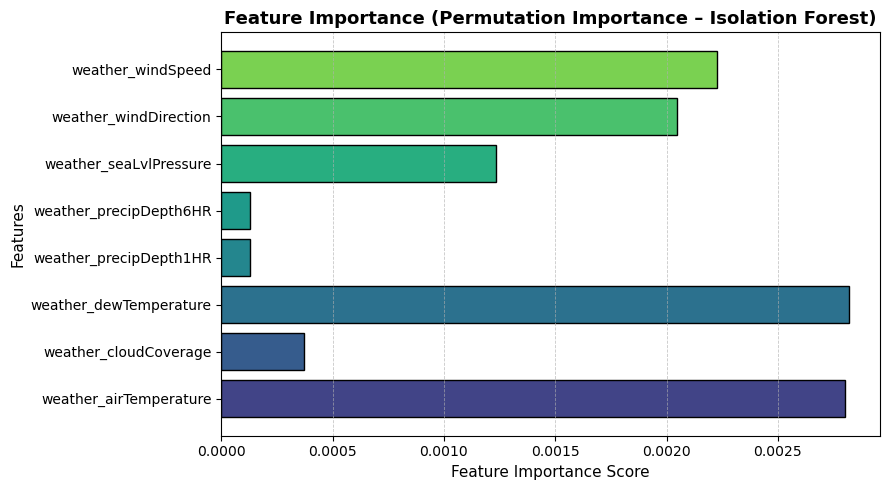

In [ ]:


# Create figure
plt.figure(figsize=(9, 5))

# Generate a professional color gradient
colors = plt.cm.viridis(
    np.linspace(0.2, 0.8, len(importances))
)

# Horizontal bar plot
plt.barh(feature_names, importances, color=colors, edgecolor='black')

# Labels and title
plt.xlabel("Feature Importance Score", fontsize=11)
plt.ylabel("Features", fontsize=11)
plt.title(
    "Feature Importance (Permutation Importance – Isolation Forest)",
    fontsize=13,
    fontweight='bold'
)

# Grid lines (professional look)
plt.grid(
    axis='x',
    linestyle='--',
    linewidth=0.6,
    alpha=0.7
)

# Improve tick appearance
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Tight layout and save
plt.tight_layout()
plt.savefig(
    "results/Graphs/feature_importance.png",
    dpi=300,
    bbox_inches="tight"
)

# Show plot
plt.show()


### 📊 Anomaly Distribution

This bar chart represents the number of normal and anomalous samples in the dataset, highlighting the imbalance and rarity of anomalous observations.


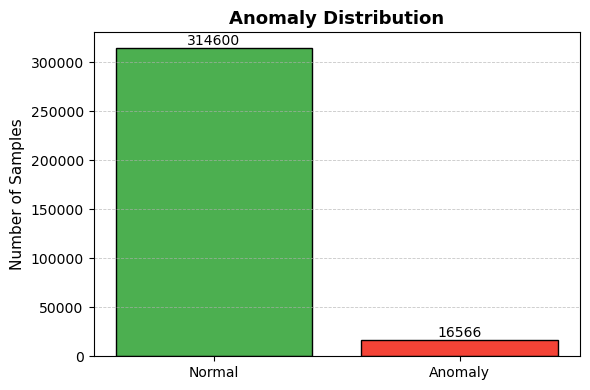

Normal: 314600
Anomalies: 16566
Anomaly %: 5.0


In [ ]:
normal_count = (df["is_anomaly"] == 0).sum()
anomaly_count = (df["is_anomaly"] == 1).sum()

labels = ["Normal", "Anomaly"]
counts = [normal_count, anomaly_count]

# Create figure
plt.figure(figsize=(6, 4))

# Professional colors
colors = ["#4CAF50", "#F44336"]  # green = normal, red = anomaly

# Bar plot
bars = plt.bar(labels, counts, color=colors, edgecolor="black")

# Labels and title
plt.ylabel("Number of Samples", fontsize=11)
plt.title("Anomaly Distribution", fontsize=13, fontweight="bold")

# Grid lines (Y-axis only)
plt.grid(
    axis="y",
    linestyle="--",
    linewidth=0.6,
    alpha=0.7
)

# Annotate values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10
    )

# Improve ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Layout & save
plt.tight_layout()
plt.savefig(
    "results/Graphs/anomaly_distribution.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

# Print statistics
print("Normal:", normal_count)
print("Anomalies:", anomaly_count)
print("Anomaly %:", round((anomaly_count / len(df)) * 100, 2))


### 📈 Weather Air Temperature with Detected Anomalies

This visualization presents air temperature variations across samples, with detected anomalies highlighted to show deviations from normal weather behavior.


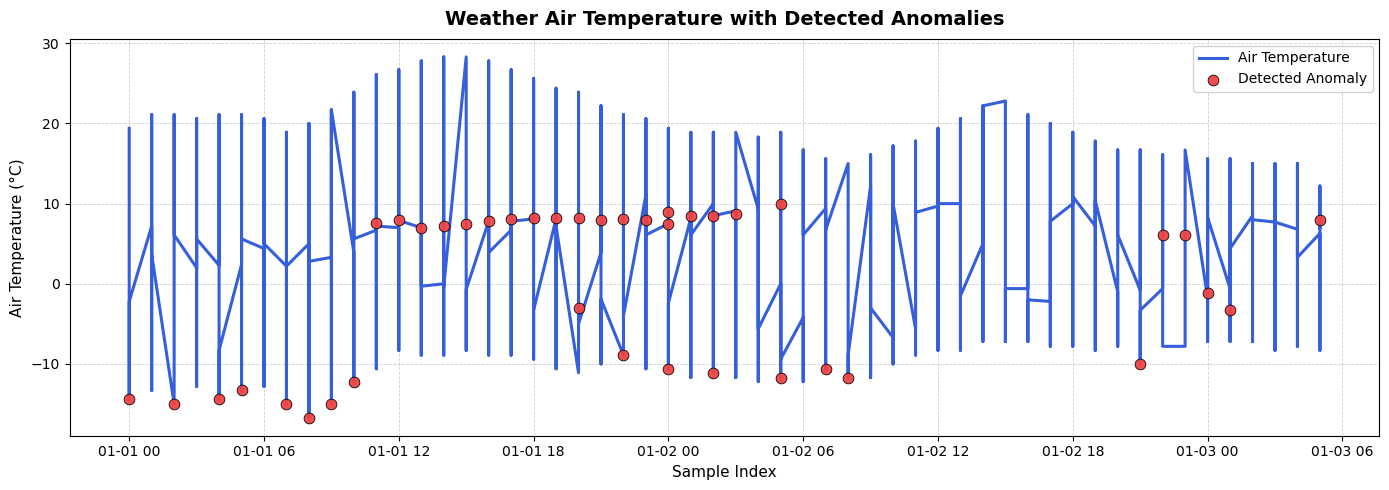

In [ ]:
# Sample data
sample_df = df.iloc[:1000]
sample_anomalies = sample_df[sample_df["is_anomaly"] == 1]

# Create figure
plt.figure(figsize=(14, 5))

# Main line (smooth professional blue)
plt.plot(
    sample_df.index,
    sample_df["weather_airTemperature"],
    color="#1f4ed8",        # deep blue
    linewidth=2.2,
    alpha=0.9,
    label="Air Temperature"
)

# Anomalies (bright contrasting color)
plt.scatter(
    sample_anomalies.index,
    sample_anomalies["weather_airTemperature"],
    color="#ef4444",        # vivid red
    edgecolor="black",
    linewidth=0.6,
    s=60,
    alpha=0.95,
    label="Detected Anomaly",
    zorder=5
)

# Labels & title
plt.xlabel("Sample Index", fontsize=11)
plt.ylabel("Air Temperature (°C)", fontsize=11)
plt.title(
    "Weather Air Temperature with Detected Anomalies",
    fontsize=14,
    fontweight="bold",
    pad=10
)

# Grid styling (soft, professional)
plt.grid(
    which="major",
    linestyle="--",
    linewidth=0.6,
    alpha=0.6
)

# Legend styling
plt.legend(
    fontsize=10,
    frameon=True,
    fancybox=True,
    framealpha=0.9
)

# Ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Layout & save
plt.tight_layout()
plt.savefig(
    "results/Graphs/timeseries_anomalies.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

### 🕒 Hour-wise Anomaly Trend

This plot displays the frequency of detected anomalies across different hours of the day based on the datetime index, helping identify temporal patterns.


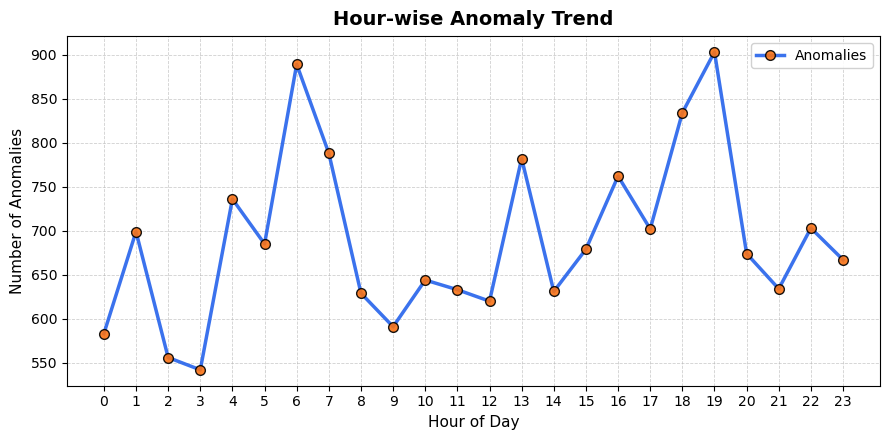

In [ ]:
# Filter anomalies
anomaly_df = df[df["is_anomaly"] == 1].copy()

# Extract hour from DatetimeIndex (CORRECT way)
anomaly_df["hour"] = anomaly_df.index.hour

# Hour-wise anomaly count
hourly_counts = anomaly_df.groupby("hour").size()

# Plot
plt.figure(figsize=(9, 4.5))

plt.plot(
    hourly_counts.index,
    hourly_counts.values,
    marker="o",
    markersize=7,
    linewidth=2.5,
    color="#2563eb",           # professional blue
    markerfacecolor="#f97316", # orange markers
    markeredgecolor="black",
    alpha=0.9,
    label="Anomalies"
)

# Labels & title
plt.xlabel("Hour of Day", fontsize=11)
plt.ylabel("Number of Anomalies", fontsize=11)
plt.title(
    "Hour-wise Anomaly Trend",
    fontsize=14,
    fontweight="bold",
    pad=8
)

# Grid styling
plt.grid(
    linestyle="--",
    linewidth=0.6,
    alpha=0.6
)

# Ticks
plt.xticks(range(0, 24))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legend
plt.legend(frameon=True, framealpha=0.9)

# Save & show
plt.tight_layout()
plt.savefig(
    "results/Graphs/hourwise_anomalies.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()